# Neural Nets

## MLP

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [2]:
muon=pd.read_csv('data/muon.csv')
muon.head()

,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,...,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,production,signal,mass,min_ANNmuon
0,18453471,0.001578,0.999999,14.033335,0.681401,0.016039,0.451886,1.900433,1482.037476,0.066667,...,12290.760742,39264.398438,3.076006,4.003800,4.031514,458,-99,0,1866.300049,0.277559
1,5364094,0.000988,0.999705,5.536157,0.302341,0.142163,9.564503,0.865666,3050.720703,0.024022,...,16562.667969,7341.257812,3.228553,2.786543,2.975564,406,-99,0,1727.095947,0.225924
2,11130990,0.000877,0.999984,6.117302,0.276463,0.034746,1.970751,10.975849,3895.908691,0.055044,...,22695.388672,10225.309570,3.536903,2.865686,3.052810,196,-99,0,1898.588013,0.368630
3,15173787,0.000854,0.999903,5.228067,0.220739,0.076389,4.271331,3.276358,4010.781738,0.053779,...,16909.515625,9141.426758,3.087461,3.218034,2.375592,137,-99,0,1840.410034,0.246045
4,1102544,0.001129,0.999995,39.069534,1.898197,0.120936,4.984982,0.468348,4144.546875,0.004491,...,97612.804688,47118.785156,4.632295,4.711155,4.296878,477,-99,0,1899.793945,0.222060


In [4]:
X=muon.drop(columns=['id', 'production', 'signal', 'mass', 'min_ANNmuon'])
y=muon.signal

In [5]:
X_s=StandardScaler().fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test=tts(X_s, y)

In [7]:
mlp=MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', max_iter=500)

mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [8]:
y_pred=mlp.predict(X_test)

In [9]:
y_prob=mlp.predict_proba(X_test)

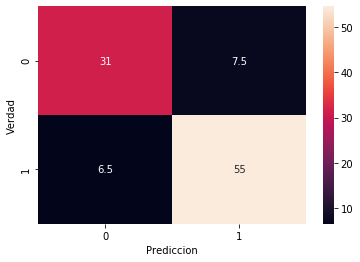

In [10]:
confusion=confusion_matrix(y_test, y_pred)
ax=sns.heatmap((confusion/len(y_pred)*100), annot=True)
b,t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)
plt.xlabel('Prediccion')
plt.ylabel('Verdad')
plt.show();

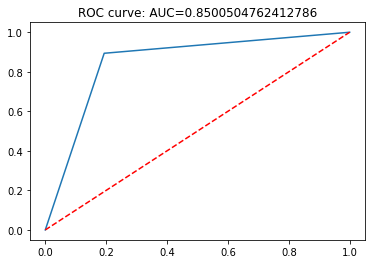

In [17]:
fpr, tpr, umb=roc_curve(y_test, y_pred)
auc=roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.title('ROC curve: AUC={}'.format(auc))
plt.show();

In [18]:
y_prob

array([[2.95773201e-01, 7.04226799e-01],
       [9.29084297e-01, 7.09157035e-02],
       [2.99797112e-01, 7.00202888e-01],
       ...,
       [1.27724324e-02, 9.87227568e-01],
       [1.05814353e-05, 9.99989419e-01],
       [9.99999955e-01, 4.50267587e-08]])

## CNN-1D

In [19]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D

Using TensorFlow backend.


In [20]:
def secuencia(lst, steps):
    X,y=[],[]
    
    for i in range(len(lst)):
        idx=i+steps
        if idx>len(lst)-1: break
        
        s_x, s_y=lst[i:idx], lst[idx]
        
        X.append(s_x)
        y.append(s_y)
        
    return np.array(X), np.array(y)

In [21]:
raw_seq=[10, 20, 30, 40, 50, 60, 70, 80, 90]

steps=3

In [22]:
X,y=secuencia(raw_seq, steps)

n_features=1

In [23]:
X=X.reshape((X.shape[0], X.shape[1], n_features))

In [24]:
#modelo

modelo=Sequential()
modelo.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps, n_features)))
modelo.add(MaxPooling1D(pool_size=2))
modelo.add(Flatten())
modelo.add(Dense(1))

modelo.compile(optimizer='adam', loss='mse')

In [25]:
modelo.fit(X, y, epochs=1000, verbose=0)

In [26]:
modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 64)             192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [27]:
# prediccion

x_input=np.array([70, 80, 90]).reshape((1, steps, n_features))

y_pred=modelo.predict(x_input, verbose=0)

In [28]:
y_pred

array([[106.888535]], dtype=float32)

## CNN-2D

In [29]:
fashion=pd.read_csv('data/fashion-mnist.csv')
fashion.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


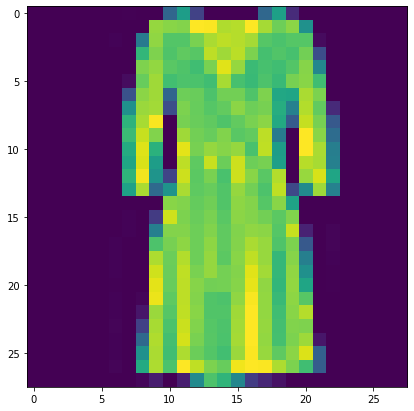

In [33]:
plt.figure(figsize=(7, 7))
plt.imshow(fashion.values[10, 1:].reshape(28, 28))
plt.show();

In [34]:
import keras
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [35]:
input_shape=(28, 28, 1)


X=np.array(fashion.iloc[:, 1:])
y=to_categorical(np.array(fashion.iloc[:, 0]))

In [36]:
X_train, X_test, y_train, y_test=tts(X, y)

In [37]:
X_train=X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test=X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255

In [38]:
batch=256

n_clases=10

epocas=50

In [40]:
modelo=Sequential()
modelo.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Dropout(0.25))
modelo.add(Conv2D(64, (3, 3), activation='relu'))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Dropout(0.25))
modelo.add(Conv2D(128, (3, 3), activation='relu'))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Dropout(0.4))
modelo.add(Flatten())
modelo.add(Dense(128, activation='relu'))
modelo.add(Dropout(0.3))
modelo.add(Dense(n_clases, activation='softmax'))


modelo.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
               metrics=['accuracy'])

modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [41]:
historico=modelo.fit(X_train, y_train, batch_size=batch, epochs=epocas, verbose=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [42]:
score=modelo.evaluate(X_test, y_test, verbose=0)

In [43]:
print ('Perdida testeo', score[0])
print ('Accuracy testeo', score[1])

Perdida testeo 0.38169561643600464
Accuracy testeo 0.8648


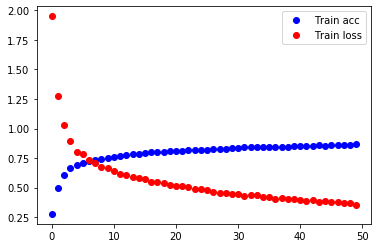

In [47]:
acc=historico.history['acc']
loss=historico.history['loss']

epocas=range(len(acc))

plt.plot(epocas, acc, 'bo', label='Train acc')
plt.plot(epocas, loss, 'ro', label='Train loss')
plt.legend()
plt.show();

## LSTM

In [49]:
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

from sklearn.metrics import mean_squared_error as mse 

In [50]:
seq_in=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

n_in=len(seq_in)

seq_in=seq_in.reshape((1, n_in, 1))

In [51]:
seq_out=seq_in[:, 1:, :]
n_out=n_in - 1 

In [52]:
modelo=Sequential()
modelo.add(LSTM(100, activation='relu', input_shape=(n_in, 1)))
modelo.add(RepeatVector(n_out))
modelo.add(LSTM(100, activation='relu', return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))
modelo.add(LSTM(100, activation='relu', return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))
modelo.add(LSTM(100, activation='relu', return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))
modelo.add(LSTM(100, activation='relu', return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))
modelo.add(LSTM(100, activation='relu', return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))
modelo.add(LSTM(100, activation='relu', return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))
modelo.add(LSTM(100, activation='relu', return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))
modelo.add(LSTM(100, activation='relu', return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))
modelo.add(LSTM(100, activation='relu', return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))

modelo.compile(optimizer='adam', loss='mse')

In [53]:
modelo.fit(seq_in, seq_out, epochs=300, verbose=0)

In [54]:
y_pred=modelo.predict(seq_in, verbose=0)

y_pred[0,:,0]

array([0.17438991, 0.290964  , 0.40051934, 0.5034088 , 0.601855  ,
       0.69897044, 0.79774636, 0.9012383 ], dtype=float32)

In [55]:
mse(seq_in[0,:,0][1:], y_pred[0,:,0])**0.5

0.00975018288746656